# 泰坦尼克号数据分析

交工1903班小组

# 背景

2018年10月28日10时08分，重庆市万州区长江二桥发生重大交通事故，一辆22路公交车在行驶中突然越过中心实线撞上一辆正常行驶的红色小轿车后坠江。据车内黑匣子监控视频显示，系乘客与司机激烈争执互殴致车辆失控。事故发生后初步核实失联人员15人，已找到13名遇难者遗体，身份已全部确认，仍有2人失联 。事故的发生受到国家的高度重视，乘客与司机互殴的现象对社会产生了恶劣影响，多数城市公交车上都为司机安装了保护隔离设施，以免类似事故再次发生。

遥想到沉默在深海里已经多年的泰坦尼克号，这种因操作不当或多种人为因素造成的灾难时有发生，我们希望通过分析类似沉船类事件中的一些问题，得到一些对与现实生活中的启示。

泰坦尼克号是当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”的美誉。然而不幸的是，在它的处女航中，泰坦尼克号便遭厄运——它从英国南安普敦出发驶向美国纽约。1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五间水密舱进水。4月15日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，1517人丧生，其中仅333具罹难者遗体被寻回。泰坦尼克号沉没事故为和平时期死伤人数最为惨重的一次海难，其残骸直至1985年才被再度发现，受到联合国教育、科学及文化组织的保护。


## 概况

  选择泰坦尼克号数据集作为分析数据。主要想探索存活情况与仓位等级（代表社会阶层）、性别、年龄、登船地点之间可能存在的关系，以及性别与仓位等级、船费与登船地点之间的关系。

## 一、初步处理数据

查看导入的数据，发现'Age'、'Cabin'、'Embarked'存在丢失值，由于后续分析要使用到'Age'和'Embarked'，所以预先将他们处理下，因为缺失值占比不大，所以决定直接将其舍去。'Cabin'由于本次分析没有涉及到，为了保持数据的完整性，不作处理。另外后面在分析'Sex'和'Embarked'时，因为要计算相关系数所以需要把值替换为数字，不过鉴于其他过程中可能还会用到该值，所以决定在具体计算相关系数时再进行转换。

1.利用pandas的read_csv导入数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# 导入数据
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2.使用pandas的dropna函数清洗缺失的数据

In [3]:
titanic_data.info()
titanic_data['Age'].dropna()
titanic_data['Embarked'].dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

# 数据含义
PassengerId：乘客Id

Survived：0代表NO，未能生还；1代表YES，生还；

Pclass：舱位等级，1,2,3，1最高，3最低；也就是俗称的一等舱、二等舱、三等舱；

Name：乘客姓名

Sex：乘客性别

Age：年龄

SibSp：由两部分组成，Sibling（兄弟姐妹，堂妹都合适），Spouse代表（丈夫或妻子）

Parch：父母和孩子组成，若只跟保姆写0

Ticket：票的数字

Fare：乘客票价

Cabin：船舱数字

Embarked：登船仓：C=Cherbourg，Q=Queenstown，S=Southampton


## 幸存情况

根据数据集，泰坦尼克号上总共有乘客891人。按幸存情况进行分组，发现幸存342人，约占总数的38%；死亡549人，约占总数的62%。泰坦尼克号沉没确实是一场悲剧，死亡人数超过六成。下图为幸存与死亡人数的饼图。

Populating the interactive namespace from numpy and matplotlib
dead: 0.6161616161616161
survived: 0.3838383838383838


<AxesSubplot:ylabel='PassengerId'>

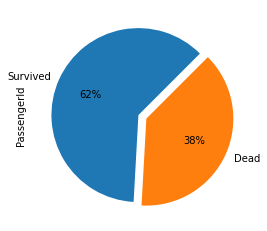

In [4]:
#  幸存人数与死亡人数，幸存342人，占比约38%；死亡549人，占比约62%
%pylab inline

# plt.rcParams['font.sans-serif']=['SimHei'] #  显示中文

# 定义group函数 将数据集按照x进行分类 这里由于只包含 Survived 和 Dead 
def groupby(x):
    return titanic_data.groupby(x)

survived_data = groupby(['Survived'])

# 统计幸存者 和死亡 人数
num_of_survived = survived_data['PassengerId'].count()

#统计登船总人数
total_num = titanic_data['PassengerId'].count()

#计算死亡率
dead = num_of_survived[0]/total_num

#计算存活率
survived = num_of_survived[1]/total_num


print("dead:",dead)
print("survived:",survived)

#绘制统计饼图
num_of_survived.plot(kind='pie',labels=("Survived","Dead"),explode=(0,0.1),autopct='%.0f%%',startangle=45)


## 幸存情况与仓位等级（社会经济状况）关系

将幸存情况和仓位等级进行分组，发现在死亡人数中，三等舱死亡最多，将近一半；而头等舱和二等舱死亡人数大体相同，头等舱略少于二等舱。而在幸存人数中，不同仓位差距不明显，二等舱略少于其他两个等级。可以看出三等舱死亡人数最多，但由于三等舱的基数大，所以死亡人数多也可以理解。因此接下来想要探索下各个仓位等级的死亡率，这个更能反应幸存情况与仓位等级的关系，一定程度上排除三等舱基数过大造成的误差。

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Pclass'>

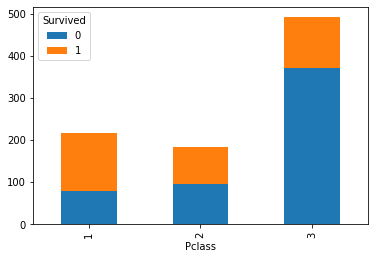

In [5]:
#  死亡方面，死亡人数最多的是三等舱，将近一半，头等舱和二等舱大体相等，头等舱死亡人数略少二等舱；幸存方面，三者都差不多，二等舱略少于头等舱及三等舱
# 下面的计算存在问题，不能看绝对人数，要看在各自人群中的比例。因为头等舱可能就10个人，结果10个人全死了，而三等舱有1000人只死了100人，虽然三等舱死亡人数大于头等舱，但是头等舱死亡比例更高

grade = groupby(['Survived','Pclass']).count()
print(grade['PassengerId'])

# labels = 'dead,1st','dead,2nd','dead,3rd','survived,1st','survived,2nd','survived,3rd'
# grade['PassengerId'].plot(kind='pie',labels=labels,explode=(0,0,0.,0.1,0.1,0.1),autopct='%1.0f%%')

groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)



计算不同仓位的死亡率和幸存率，发现确实三等舱的死亡率最高，而幸存率最低；一等舱则死亡率最低，幸存率最高。推测一等舱的上层阶级更优先得到救援，而三等舱的底层阶级则反之。

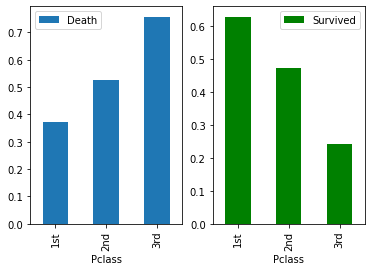

In [6]:
#  头等舱的死亡率最低，随着仓位等级的下降，死亡率升高；幸存率头等舱最高，随着仓位等级下降，幸存率下降。排除了只看绝对人数带来的误差

plt.subplot(121)
dead_pclass_percent = (1-groupby('Pclass')['Survived'].mean()).plot(kind='bar',label="Death")
plt.xticks((0,1,2),('1st','2nd','3rd'))
plt.legend()
plt.subplot(122)
survived_pclass_percent = groupby('Pclass')['Survived'].mean().plot(kind='bar',label="Survived",color='g')
plt.xticks((0,1,2),('1st','2nd','3rd'))
plt.legend()

计算仓位等级与幸存与否的皮尔森相关系数，约为-0.338，为负相关。即为仓位等级越差（数值越高，因为1为头等舱，3为末等舱），死亡率越高（数值越低，因为幸存为1，死亡为0），但相关性不是很强

In [7]:
# 计算仓位等级与幸存与否的皮尔森相关系数，约为-0.338，为负相关。即为仓位等级越差（数值越高，因为1为头等舱，3为末等舱），死亡率越高（数值越低，因为幸存为1，死亡为0），但相关性不是很强

a = titanic_data['Pclass']
b = titanic_data['Survived']
np.corrcoef(a,b)

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

## 幸存情况与性别关系

将数据按幸存情况及性别分组，发现男性死亡468人，占总人数53%，超过一半以上；女性死亡81人，占9%。男性幸存109人，占总人数12%，女性幸存109人，占26%。

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Survived,Sex'>

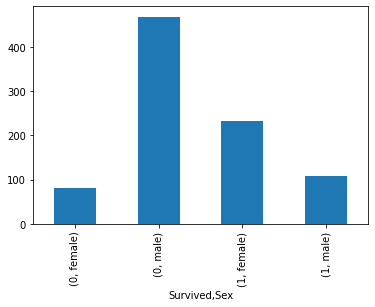

In [8]:
# 男性死亡468人，占总人数53%，超过一半以上；女性死亡81人，占9%；

sex = groupby(['Survived','Sex']).count()
print(sex['PassengerId'])

sex['PassengerId'].plot(kind='bar')

同样，因为男性的总人数远大于女性，单看男女的死亡、幸存人数并不科学，所以接着计算不同性别各自的死亡率。经计算发现，男性死亡率非常高，而幸存率极低，基本船上大部分男性都死于此次事故；女性幸存率非常高，死亡率很低，只有少部分女性死于此次事故。猜测为大部分男性都将获救的机会优先让给了女性。

In [9]:
# 计算男女人数,男性577人，女性314

female = groupby(['Sex'])['PassengerId'].count()[0]
male = groupby(['Sex'])['PassengerId'].count()[1]

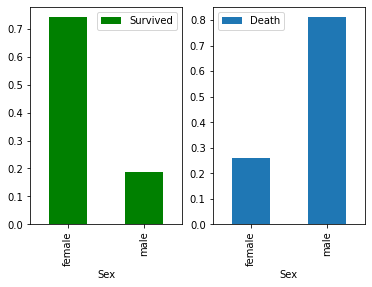

In [10]:
#  男性死亡率非常高，而幸存率极低，基本上大部分男性都死于此次事故；女性幸存率非常高，死亡率很低，少部分女性死于此次事故

plt.subplot(121)
groupby('Sex')['Survived'].mean().plot(kind='bar',label="Survived",color='g')
plt.xticks((0,1),('female','male'))
plt.legend()
plt.subplot(122)
(1-groupby('Sex')['Survived'].mean()).plot(kind='bar',label="Death")
plt.xticks((0,1),('female','male'))
plt.legend()

接着探索性别与幸存情况自己的相关性强弱。由于sex属性并非是数字，所以corrcoef函数无法使用。因此将sex属性的值都转换为数字（female：0 male：1）,经计算呈负相关,越偏向男性幸存几率越低，相关系数为-0.54。

In [11]:
# 性别和幸存呈负相关，男性幸存几率更低，相关系数为-0.54

titanic_data['Sex'] = titanic_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int) 
np.corrcoef(titanic_data['Sex'], titanic_data['Survived'])

array([[ 1.        , -0.54335138],
       [-0.54335138,  1.        ]])

## 幸存情况与年龄关系

在数据中，有统计到年龄的共有714人，177人未能统计到年龄，为方便分析在初步处理数据时已经将缺失值舍弃。在统计到的年龄中，最小为0.42，最大为80，其中24岁年龄的人数最多，为30人。将年龄按每十岁为一个阶段，分为6个年龄段（最后一个为大于60），可以看出船上大部分人都是20-40岁的青壮年，其次为10-20岁的少年，猜测为一家人出行，家长带着孩子们。



In [12]:
# 共有多少人统计了年龄
age = groupby('Age')
age.count()['PassengerId'].sum()

# 哪个年龄统计到的人数最多，为多少
age.count()['PassengerId'].max()
age.count()['PassengerId'].argmax()

31

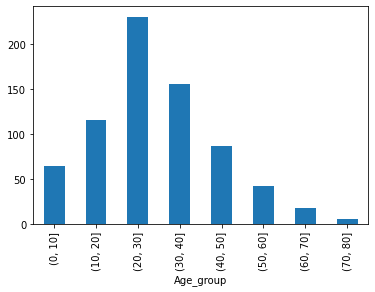

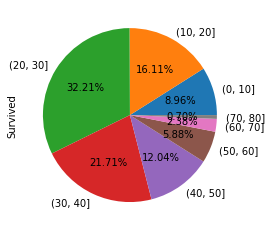

In [13]:
# 最大和最小年龄
titanic_data['Age'].min()
titanic_data['Age'].max()

# 将年龄分为8段
bins = np.arange(0,90,10)
titanic_data['Age_group'] = pd.cut(titanic_data['Age'],bins)

groupby('Age_group')['Survived'].count().plot(kind='bar')
plt.show()

groupby('Age_group')['Survived'].count().plot(kind='pie',autopct='%1.2f%%')
plt.show()

在死亡的名单中，年龄最小为1岁,最大为74岁;幸存的人最小0.42，最大80岁。其中21岁的人死亡最多，为19人。在统计到年龄的人群中，死亡人数最多的是20-40岁的青壮年，但幸存人数最多的同样也是20-40岁的青壮年。

In [14]:
# 死亡人数最多的年龄及人数
age2 = groupby(['Survived','Age'])
# print(age2.count()['PassengerId'])
age2.count()['PassengerId'][0].argmax()
age2.count()['PassengerId'][0].max()

# 死亡人数中最大及最小年龄，幸存人数中最大及最小年龄
groupby(['Survived'])['Age'].min()
groupby(['Survived'])['Age'].max()


Survived
0    74.0
1    80.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age_group'>

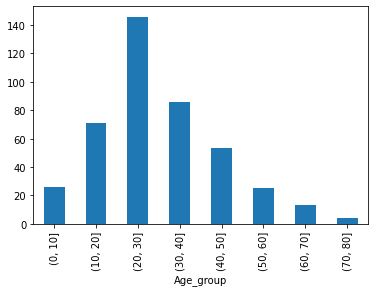

In [15]:
# 在统计到年龄的人群中，死亡人数最多的是20-40岁的青壮年

# plt.subplot(121)
groupby(['Survived','Age_group'])['Survived'].count()[0].plot(kind='bar')
# plt.subplot(122)
# groupby(['Survived','Age_group'])['Survived'].count()[0].plot(kind='pie',autopct='%1.2f%%')

<AxesSubplot:xlabel='Age_group'>

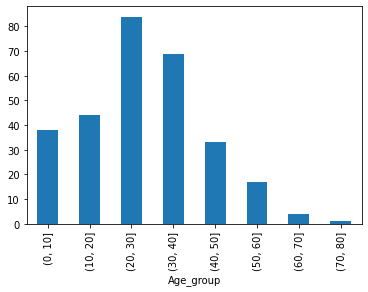

In [16]:
# 在统计到年龄的人群中，幸存人数最多的是20-40岁的青壮年

# plt.subplot(121)
groupby(['Survived','Age_group'])['Survived'].count()[1].plot(kind='bar')
# plt.subplot(122)
# groupby(['Survived','Age_group'])['Survived'].count()[1].plot(kind='pie',autopct='%1.2f%%')

死亡人员中，各年龄段的比例都大体相同。在幸存人员中，10岁以下的小孩比例最高，猜测大家都把获救的机会尽可能的让给小孩，优先救小孩。随着年龄的增加死亡率越高，猜测是因为老年人把更多的生存机会留给了年轻人，或者是老年人生存能力较弱。据图可看出，死亡率在11-60这个年龄段还是相对平稳的，但在0-10和60以上者两个年龄段都急剧上升，猜测是因为这两个年龄段的人身体素质都比较差，生存能力较弱。

<AxesSubplot:xlabel='Age_group'>

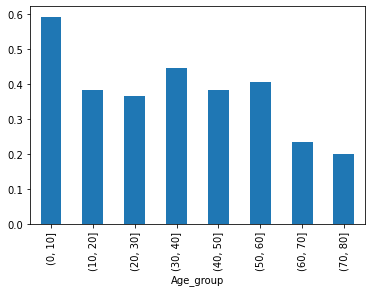

In [17]:
# 由于直接计算绝对人数可能存在误导，所以计算各年龄段死亡人数在其年龄段内所占比例

# plt.subplot2grid((2,2),(0,0),colspan=2)
groupby(['Age_group'])['Survived'].mean().plot(kind='bar')
# plt.subplot(223)
# groupby(['Age_group'])['Survived'].mean().plot(kind='pie',subplots=True,autopct='%.2f%%',colors=['r', 'g', 'b', 'c','y','m','burlywood','deeppink'])
# groupby(['Age_group'])['Survived'].mean()
# plt.subplot(224)
# (1-groupby(['Age_group'])['Survived'].mean()).plot(kind='pie',subplots=True,autopct='%.2f%%',colors=['r', 'g', 'b', 'c','y','m','burlywood','deeppink'])

接着计算其相关系数，呈负相关，但相关系数非常低，几乎可以认为不相关。

In [18]:
# 呈负相关，但相关系数非常低，几乎可以认为不相关

a = titanic_data['Age'].dropna()
index = a.index
b = titanic_data['Survived'][index]
np.corrcoef(a,b)

array([[ 1.        , -0.07722109],
       [-0.07722109,  1.        ]])

## 幸存与上船地点

'Embarked'存在缺失值，为方便分析在初步处理数据时已经将缺失值舍弃。将数据按照上船地点和乘客ID分组后，发现南安普顿上船的人数最多，为644人；皇后镇上船的人最少，77人。猜测南安普顿应该是起航地点，后经查资料证实确实如此。

168

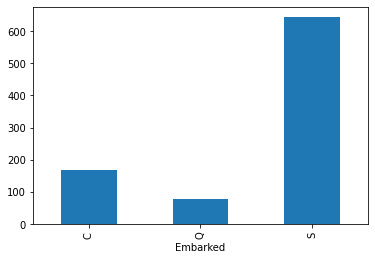

In [19]:
# 南安普顿上船的人数最多，为644人；皇后镇上船的人最少，77人
groupby(['Embarked'])['PassengerId'].count().plot(kind='bar')

C = groupby(['Embarked'])['PassengerId'].count()['C']
Q = groupby(['Embarked'])['PassengerId'].count()['Q']
S = groupby(['Embarked'])['PassengerId'].count()['S']
C

那么将按照幸存情况和上船地点分组后，发现在南安普顿上船的人死亡最多，皇后镇的最少；幸存人数也同样是南安普顿的人最多，皇后镇的人最少。同样由于南安普顿上船的人数太多，所以我们还是分别计算不同地点上船的死亡率和幸存率。经计算发现，瑟堡的幸存率最高，南安普顿的最低；死亡率则南安普顿最高，瑟堡最低。这跟我预想的有点不一样，因为单看人数皇后镇要比瑟堡死的人少，这充分说明了计算各自比例的必要性。


<AxesSubplot:xlabel='Survived'>

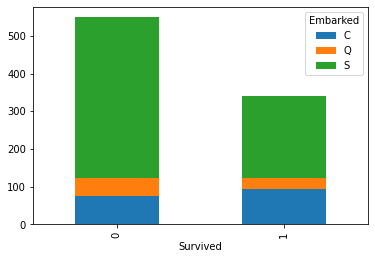

In [20]:
# 从南安普顿上船的人死亡人数最多，而皇后镇的最少；幸存人数同样南安普顿的人最多，皇后镇的人最少

groupby(['Survived','Embarked'])['Survived'].count().unstack().plot(kind='bar',stacked='True')

<AxesSubplot:xlabel='Embarked'>

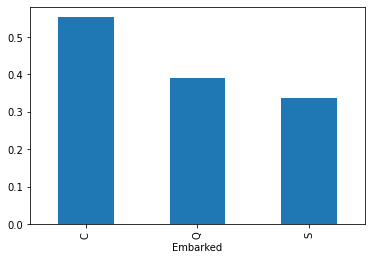

In [21]:
# 瑟堡的幸存率最高，南安普顿的最低；死亡率则南安普顿最高，瑟堡最低

# plt.subplot2grid((2,2),(0,0),colspan=2)
groupby('Embarked')['Survived'].mean().plot(kind='bar')

# plt.subplot(223)
# plt.title('survived')
# groupby('Embarked')['Survived'].mean().plot(kind='pie',autopct='%.2f%%')

# plt.subplot(224)
# plt.title('dead')
# (1-groupby('Embarked')['Survived'].mean()).plot(kind='pie',autopct='%.2f%%')

同样计算相关性，将上船地点分别修改为'C': 1, 'Q': 2, 'S':3，经计算发现呈负相关，但相关性不高，相关系数为-0.17

In [22]:
# 呈负相关，但相关性不高
# 去除空值,将C，Q，S改为1,2,3
a= titanic_data['Embarked'].dropna()
b= a.map( {'C': 1, 'Q': 2, 'S':3} ).astype(int)

index = b.index
c=titanic_data['Survived'][index]
np.corrcoef(b,c)

array([[ 1.        , -0.16971768],
       [-0.16971768,  1.        ]])

## 船费和上船地点

为了进一步探索，为什么南安普顿的死亡率会比较高，而瑟堡的幸存率高，所以探索船费与上船地点之间的关系。发现瑟堡的平均费用最高,约为60，且有一名乘客花费了512元购买了一张一等票，约为瑟堡平均费用的8.5倍。推测瑟堡的消费水平可能很高，要么是经济非常发达，要么就是经济落后，船票奇货可居。皇后镇的平均费用最便宜，为13，且购买一等票的只有2人，推测皇后镇可能消费能力较低或者距离终点最近。而南安普顿平均费用为27，且上船人数最多，推测为始发点（经查资料确认确实如此）。

In [ ]:
groupby('Embarked')['Fare'].mean()
# groupby(['Embarked','Pclass']).describe()

按照上船地点及仓位等级分组后发现，瑟堡的一等舱卖的最贵，南安普顿的最便宜。三等舱则大家都相差不大。

In [ ]:
seaborn.factorplot(kind='box',y='Fare',x='Pclass',hue='Embarked',data=titanic_data,sym='',size=8,aspect=1.5)

## 性别与仓位等级关系

在一等二等舱，男女人数差别不大，但在三等舱，男性的数量明显比女性要多一倍有余，推测是有很多底层的男性梦想通过在美国实现财富自由。然后观察不同仓位等级男女的幸存情况，发现不管是哪一个仓位，女性的存活率都远大于男性。

<AxesSubplot:title={'center':'Sex vs Pclass vs Survived rate'}, xlabel='Pclass', ylabel='Survived rate'>

<Figure size 1008x360 with 0 Axes>

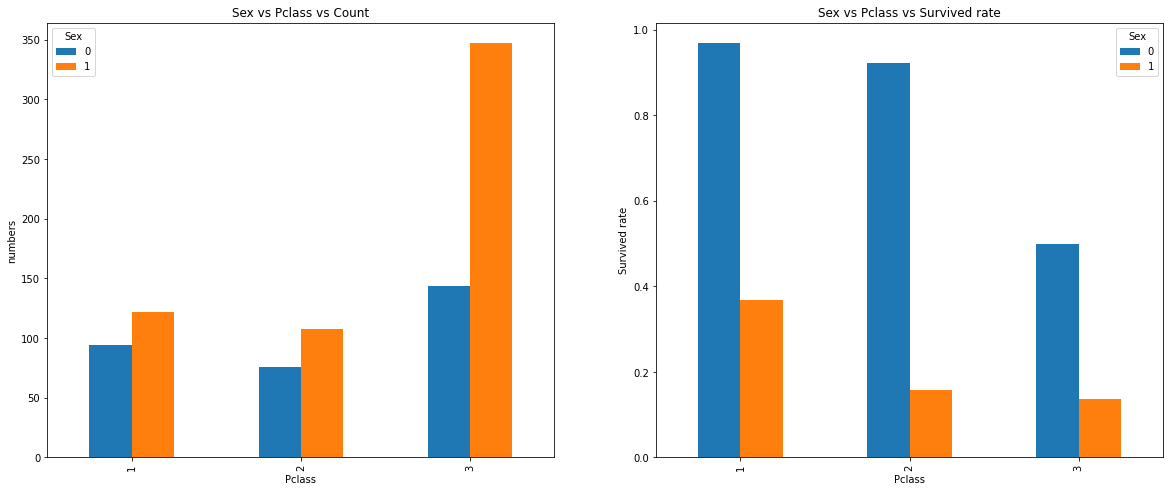

In [23]:
# 在一等二等舱，男女人数差别不大，但在三等舱，男性的数量明显比女性要多一倍有余，推测是有很多底层的男性梦想通过在美国实现财富自由。

plt.figure(figsize=(14,5))
f,(ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Sex vs Pclass vs Count')
ax1.set_ylabel('numbers')
ax2.set_title('Sex vs Pclass vs Survived rate')
ax2.set_ylabel('Survived rate')
f.set_size_inches(20,8)
groupby(['Pclass','Sex'])['Survived'].count().unstack().plot(kind='bar',ax = ax1)
groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar',ax = ax2)

将性别和仓位等级分组后，发现一个有趣的现象，一等舱的男性年龄普遍比女性要大7岁，三等舱大5岁，而二等舱差异则不明显，大2岁。猜测二等舱都是中产阶级，男女差异不大，年龄相仿。一等舱则为成功人士，男性携带年轻的夫人，甚至情妇。而三等舱则尚不明确是什么原因造成的，有待以后的进一步挖掘。


In [ ]:
groupby(['Sex','Pclass']).describe()

## 什么名字的人最多

最后，统计了一下叫什么名字的人最多。在去掉了诸如Mr、Miss、Mrs等称谓之后，发现船上叫William的人最多。然而遗憾的是叫William的人死的也最多，不过你以为这就完了William的人同样也是幸存最多的人。不得不说，William真是一个神奇的名字。

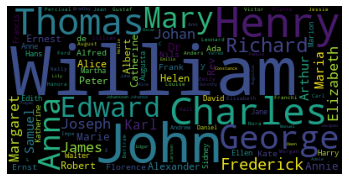

In [24]:

from wordcloud import WordCloud,STOPWORDS

def wc(data):


    word=''
    for i in data1:
        word += i

    WC = WordCloud(stopwords={'Mr','Miss','Mrs','Master'}).generate(word)


    plt.figure()
    plt.imshow(WC)
    plt.axis("off")

data1 = titanic_data['Name'].tolist()
wc(data1)

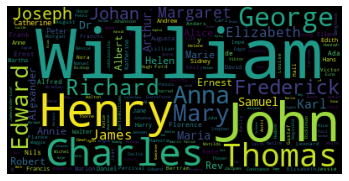

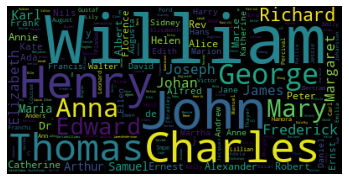

In [25]:
# 死亡姓名
data3 = titanic_data.loc[:,['Survived','Name']].set_index('Survived')
dead = data3['Name'][0]
wc(dead)

# 幸存姓名
data3 = titanic_data.loc[:,['Survived','Name']].set_index('Survived')
survived = data3['Name'][1]
wc(survived)

死亡名单和幸存者名单如上

# 结论与事件的联系
本次数据分析，我们可以清晰明了地看出此次海难事故中，妇女和儿童的生存率相对较高，同时，社会阶级地位较高较为富有的乘客存活率也比较高，这与当时海难发生的时代背景和当时的西方社会现状是比较吻合的。

据悉，在当时船舱内的乘客和船员们得知船体受到撞击前，处于不同舱位的人对事故的感知程度是不同的，这也间接说明了高级舱位的安全性更高。
据事故后采访得知，头等舱和二等舱一些睡得不熟的乘客们被一阵轻微的似金属刮擦声给惊醒了，船身轻微震动了一下。有人以为遇上了大浪，有人以为是触礁了，还有人以为是螺旋桨发生了故障。但是下面船舱的乘客们感觉到的震动剧烈得多。底层统舱的移民乘客更是心惊肉跳地发现，冰冷刺骨的海水不知道正从什么地方漫过门缝并涌入寝室内，船很快停了下来。

资料调查显示，泰坦尼克号将乘客分为三个等级。三等舱位在船身较下层也最便宜，这一类的乘客身份多为计划在大西洋对岸营造新生活的移民；二等舱与一般客房的装潢摆设，其实具备与当时其他一般船只的头等舱一样的等级，许多二等舱乘客原先是在其他船只上定位头等舱，却因为了泰坦尼克号的航行，将煤炭能源转移给泰坦尼克号而作罢。一等舱是整艘船只最为昂贵奢华的部分，当时世界最富有的几位名人就在这趟旅程上。由此，也说明了在船体靠下舱位的乘客，也就是大部分下层人民在海难降临时，逃生的概率极低，遇难概率极高，这也与本小组进行的数据分析结果相对应。

当然，此次沉船事件的来龙去脉一直备受争议，仅从本小组获取到的乘客数据中是无法得到全局认识的，但就目前的数据分析我们可知，当时西方社会的等级制度、危难时刻妇孺优先的绅士风度，以及泰坦尼克号设计建造成功后在当时引起的轰动等，都是可以被数据证实的。